<a href="https://colab.research.google.com/github/MI9JAHIN/Drug_Addicted/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [265]:
import numpy as np
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Thesis/Main/Combine_DataSet.xlsx - Form Responses 1.csv')

# **Preprocessing**

Visualization

In [266]:
data

,Age,Gender,Addicted_with,Age_of_First Use,Reason_to_become_addicted,Religion,Take_drug,Education_Level,Employment_Status,Marital_Status,...,Criminal_Activity,Arrested_for_drug use,Stay_outside_at_night,Healthcare,Mental_Health_Status,Physical_Health_Status,Sleep_Quality,Eating_Habits,Behavioral_Factors,History_of_Trauma
0,20 to 24 years,Male,Single drug,25 to 29 years,None.,Muslim,In a week,HSC/A level,Un-employee,Unmarried,...,Never,Never,Never,Average,Average,Average,Average,Average,Rude,Never
1,20 to 24 years,Male,Single drug,20 to 24 years,Depression,Muslim,In a week,Undergraduate/under Degree,Un-employee,Unmarried,...,Yes,Single time,Multiple Time,Average,Average,Average,Average,Average,Emotional,Never
2,25 to 29 years,Male,Multiple drug,15 to 19 years,None.,Muslim,In a week,HSC/A level,Un-employee,Unmarried,...,Yes,Never,Never,Poor,Poor,Poor,Poor,Poor,Rude,Never
3,20 to 24 years,Female,Single drug,20 to 24 years,None.,Hinduism,In a year,Undergraduate/under Degree,Un-employee,Married,...,Some time I feel,Never,Never,Good,Good,Good,Good,Good,Emotional,Never
4,15 to 19 years,Male,Multiple drug,15 to 19 years,None.,Muslim,In a month,SSC/A level,Un-employee,Unmarried,...,Never,Never,Never,Average,Average,Average,Average,Average,Friendly,Never
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,30 to 34 years,Male,Multiple drug,20 to 24 years,Love problems,Hinduism,Never,Undergraduate/under Degree,Business,Unmarried,...,Some time I feel,Multiple Time,Single time,Poor,Good,Good,Average,Healthy,Soft,Multiple
1211,20 to 24 years,Male,Single drug,20 to 24 years,None.,Muslim,Never,Undergraduate/under Degree,Student,Unmarried,...,Never,Never,Never,Good,Good,Good,Good,Healthy,Friendly,Never
1212,25 to 29 years,Male,None.,None.,Depression,Muslim,Regular,Undergraduate/under Degree,Student,Unmarried,...,Never,Never,Multiple Time,Average,Average,Average,Average,Average,Soft,Single
1213,30 to 34 years,Male,Single drug,15 to 19 years,None.,Muslim,Never,Undergraduate/under Degree,Student,Unmarried,...,Never,Never,Never,Good,Average,Average,Poor,Average,Friendly,Never


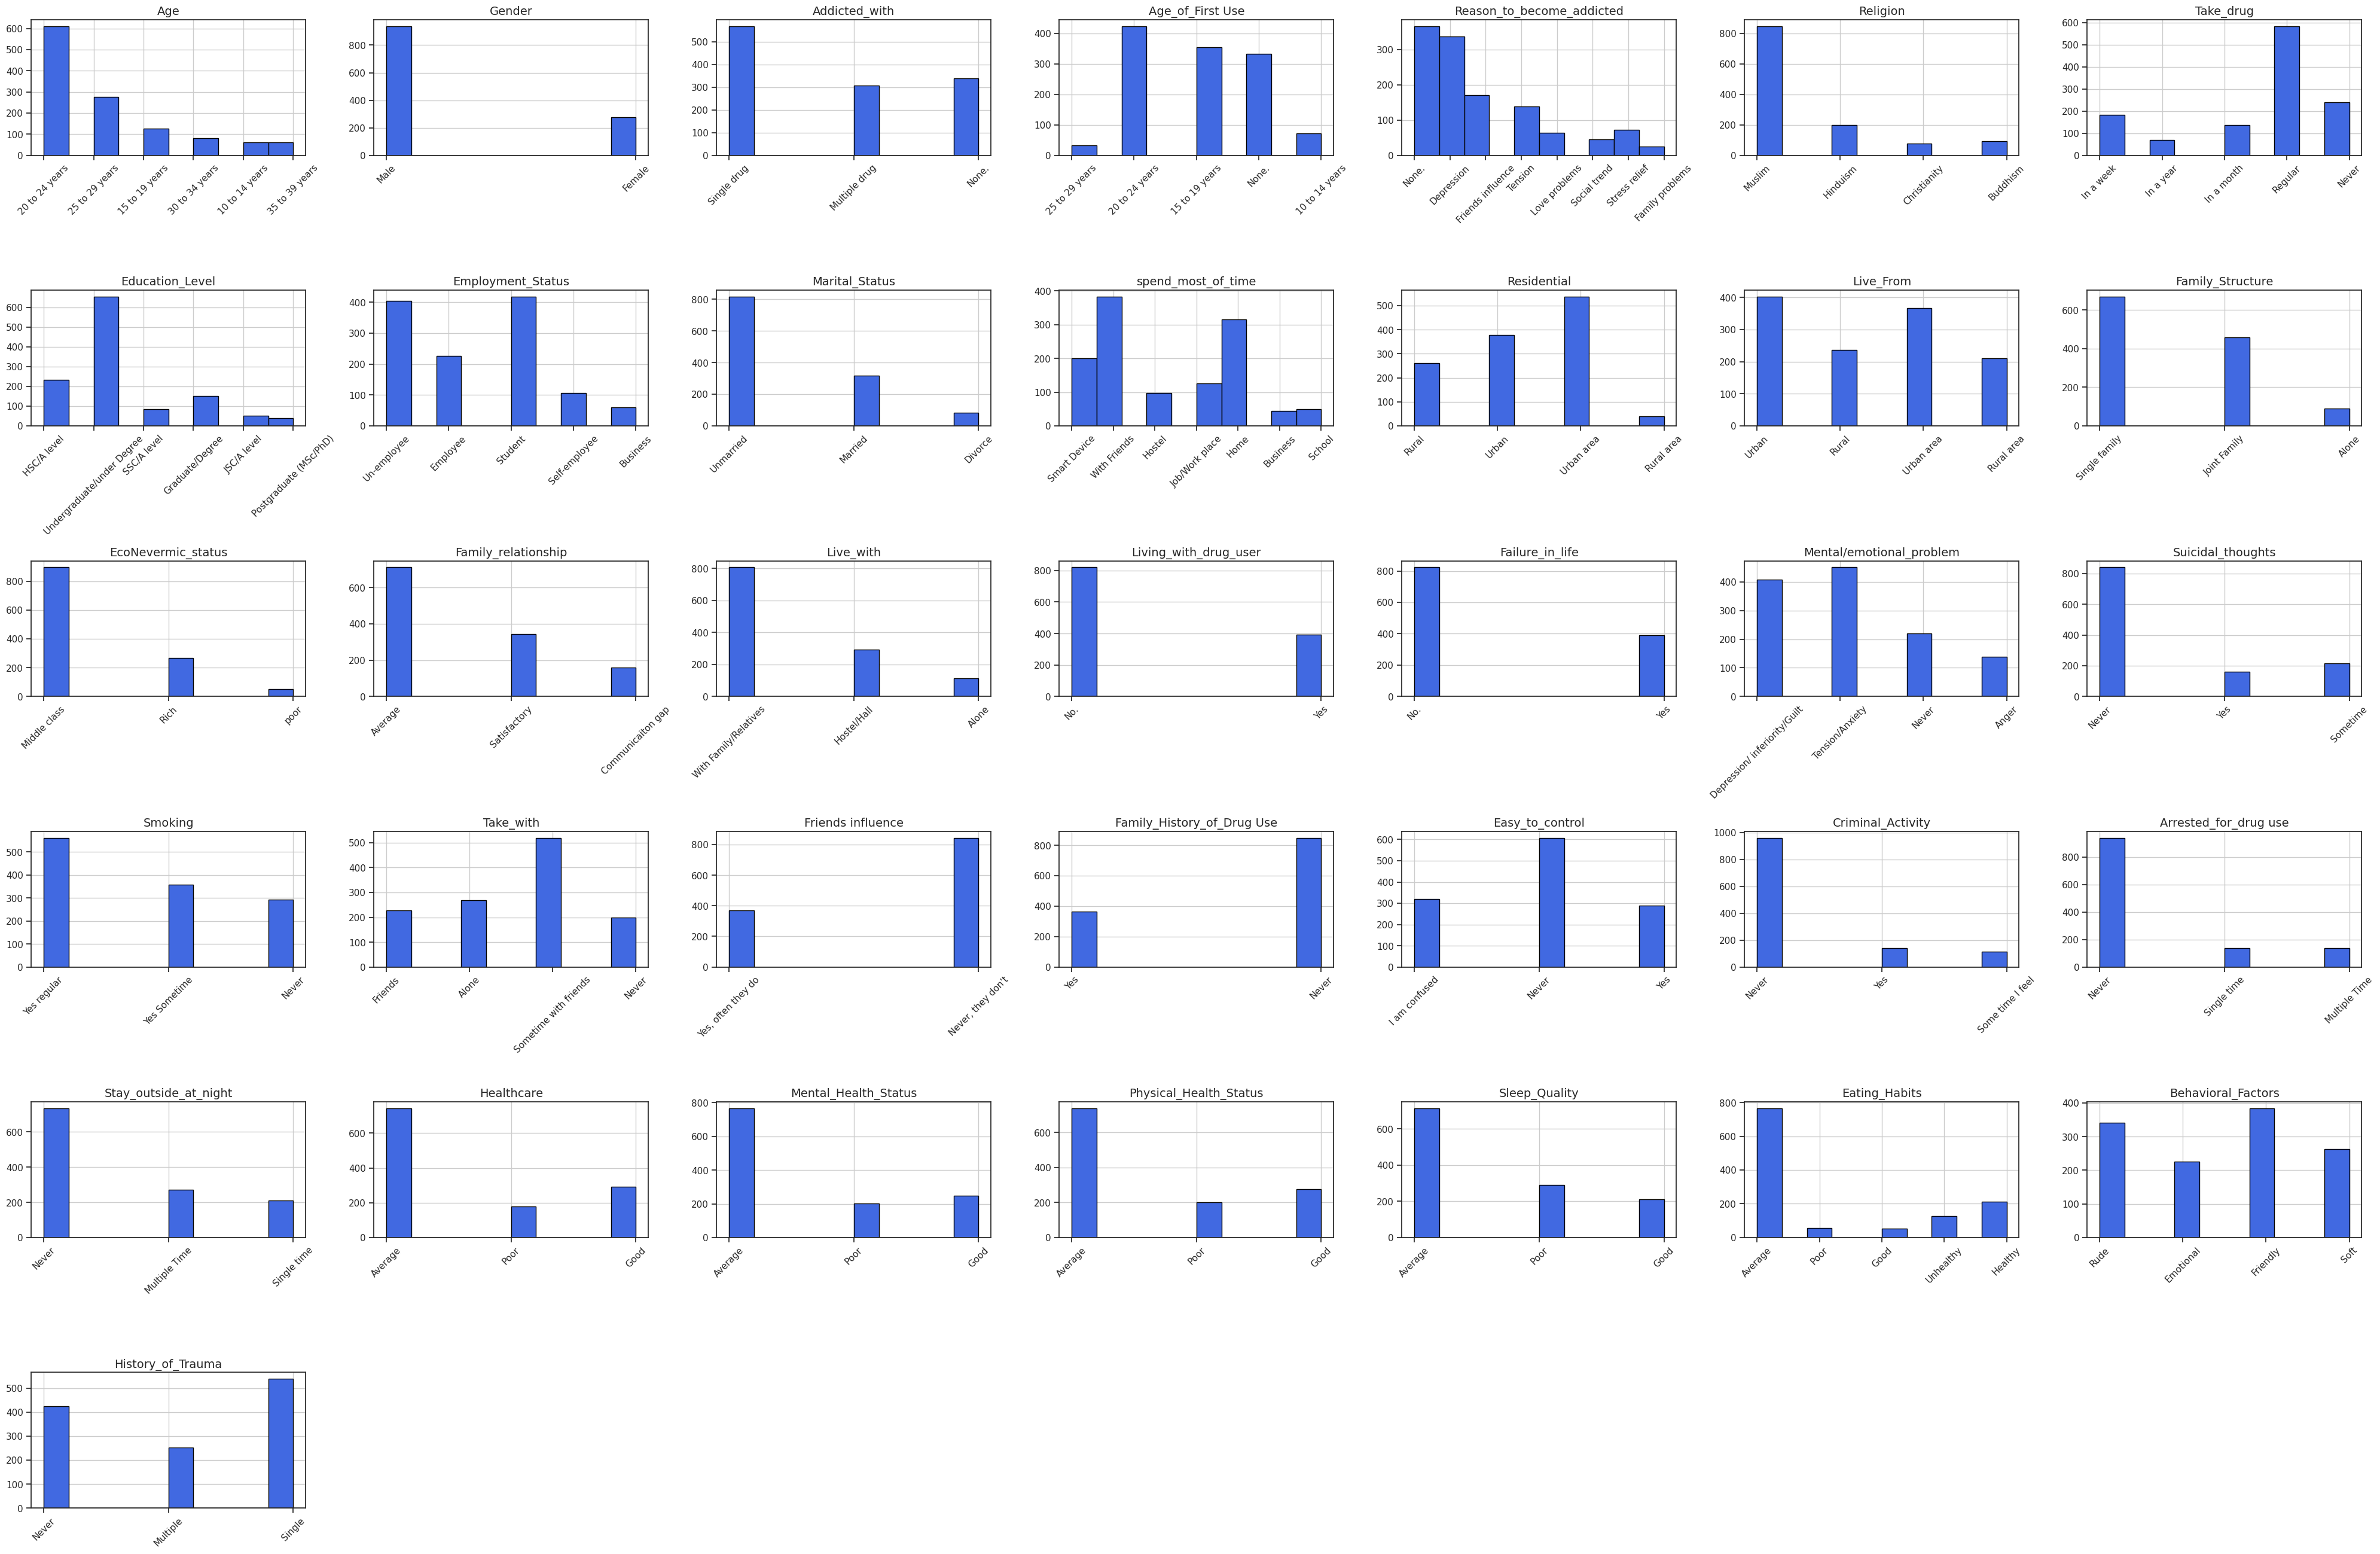

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(40, 30))
for i, column in enumerate(data.columns, 1):
    plt.subplot(7, 7, i)
    data[column].hist(bins=10, edgecolor='black', color='RoyalBlue')
    plt.title(column, fontsize=14)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Male vs Female

<ipython-input-267-3a91653812a4>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
<ipython-input-267-3a91653812a4>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
<ipython-input-267-3a91653812a4>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
<ipython-input-267-3a91653812a4>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
<ipython-input-267-3a91653812a4>:17: UserWarning: set_ticklabels() s

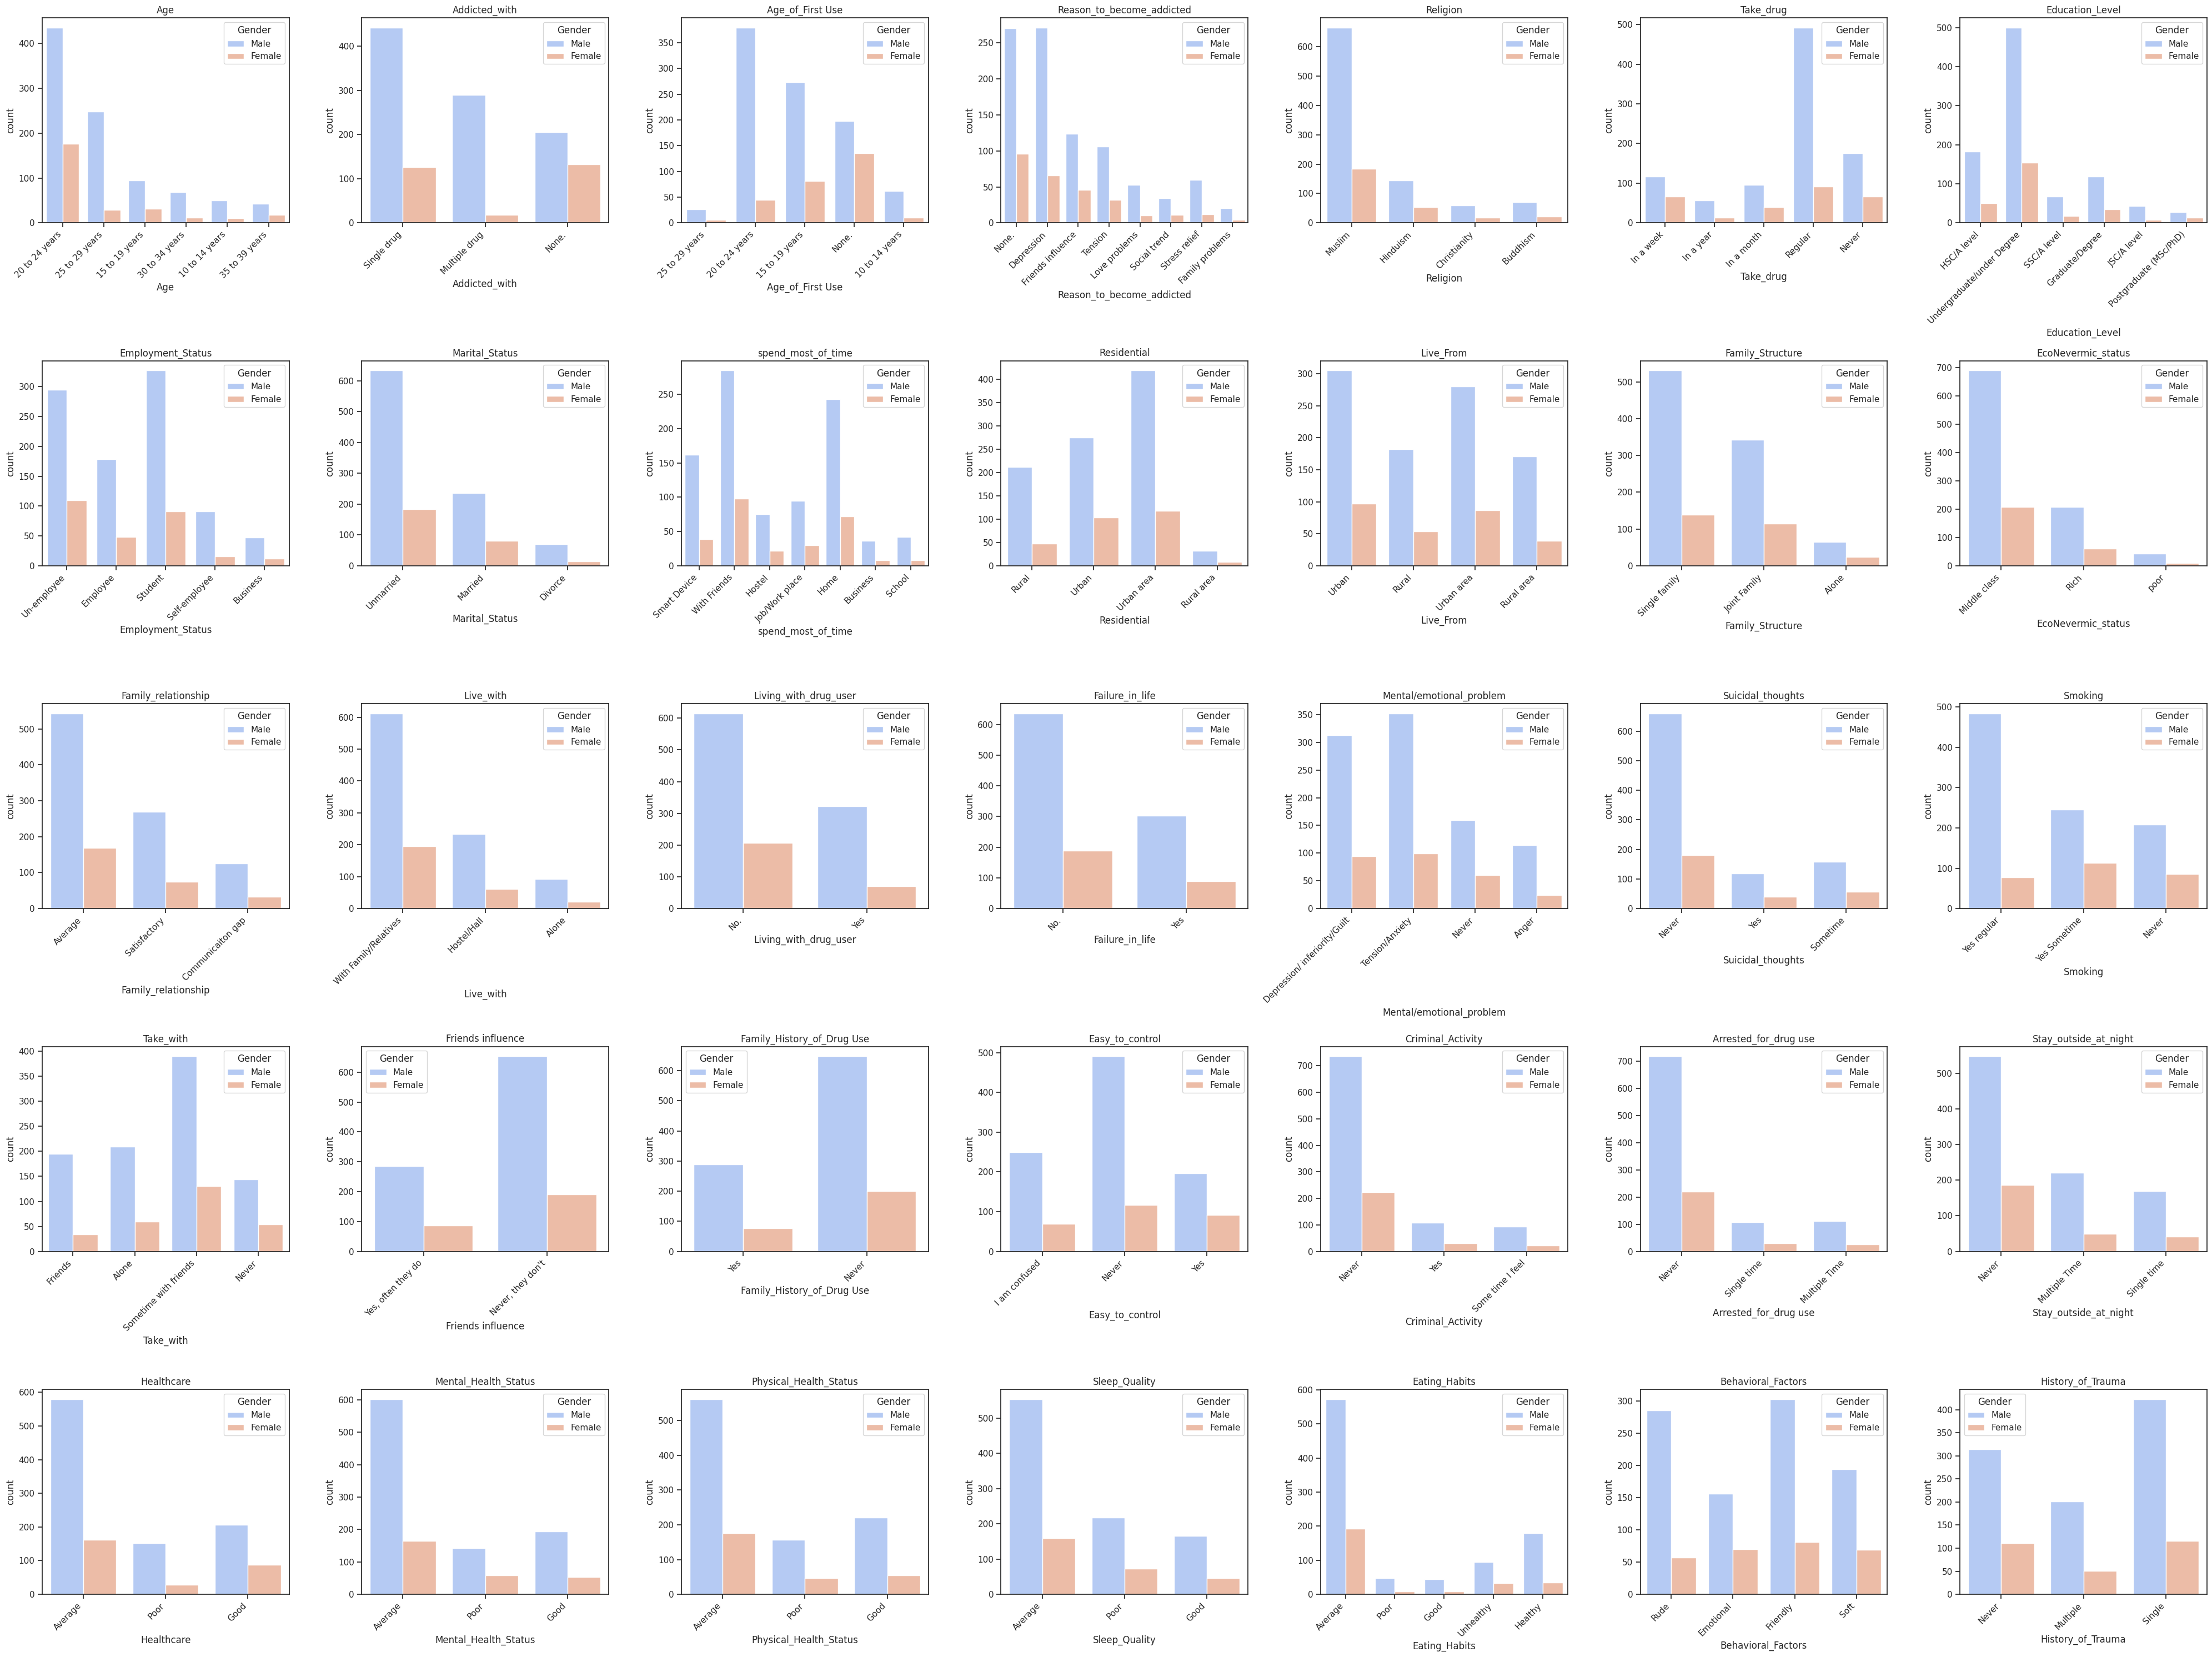

In [267]:
sns.set_theme(style="ticks")

num_cols = 7
num_rows = int(((len(data.columns) - 1) + num_cols - 1) / num_cols)

width = int(40)
height = int(30)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(width, height))
axes = axes.flatten()
plot_index = 0

for column in data.columns:
    if column != "Gender":
        ax = axes[plot_index]
        sns.countplot(x=column, hue="Gender", data=data, palette="coolwarm", ax=ax)
        ax.set_title(column, fontsize=12)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
        plot_index += 1

# Remove any unused subplots
for i in range(plot_index, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

if any missing values exist

In [268]:
data.isnull().values.any()

True

Remove rows with any missing values

In [269]:
data.dropna(inplace=True)
#data.head()

In [270]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1210,False
1211,False
1212,False
1213,False


## Encoding Categorical Variables: Convert categorical data into numerical format.

In [271]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns[0:]:
  data[i]=le.fit_transform(data[i])

In [272]:
data

,Age,Gender,Addicted_with,Age_of_First Use,Reason_to_become_addicted,Religion,Take_drug,Education_Level,Employment_Status,Marital_Status,...,Criminal_Activity,Arrested_for_drug use,Stay_outside_at_night,Healthcare,Mental_Health_Status,Physical_Health_Status,Sleep_Quality,Eating_Habits,Behavioral_Factors,History_of_Trauma
0,2,1,2,3,4,3,1,1,4,2,...,0,1,1,0,0,0,0,0,2,1
1,2,1,2,2,0,3,1,5,4,2,...,2,2,0,0,0,0,0,0,0,1
2,3,1,0,1,4,3,1,1,4,2,...,2,1,1,2,2,2,2,3,2,1
3,2,0,2,2,4,2,2,5,4,1,...,1,1,1,1,1,1,1,1,0,1
4,1,1,0,1,4,3,0,4,4,2,...,0,1,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,4,1,0,2,3,2,3,5,0,2,...,1,0,2,2,1,1,0,2,3,0
1211,2,1,2,2,4,3,3,5,3,2,...,0,1,1,1,1,1,1,2,1,1
1212,3,1,1,4,0,3,4,5,3,2,...,0,1,0,0,0,0,0,0,3,2
1213,4,1,2,1,4,3,3,5,3,2,...,0,1,1,1,0,0,2,0,1,1


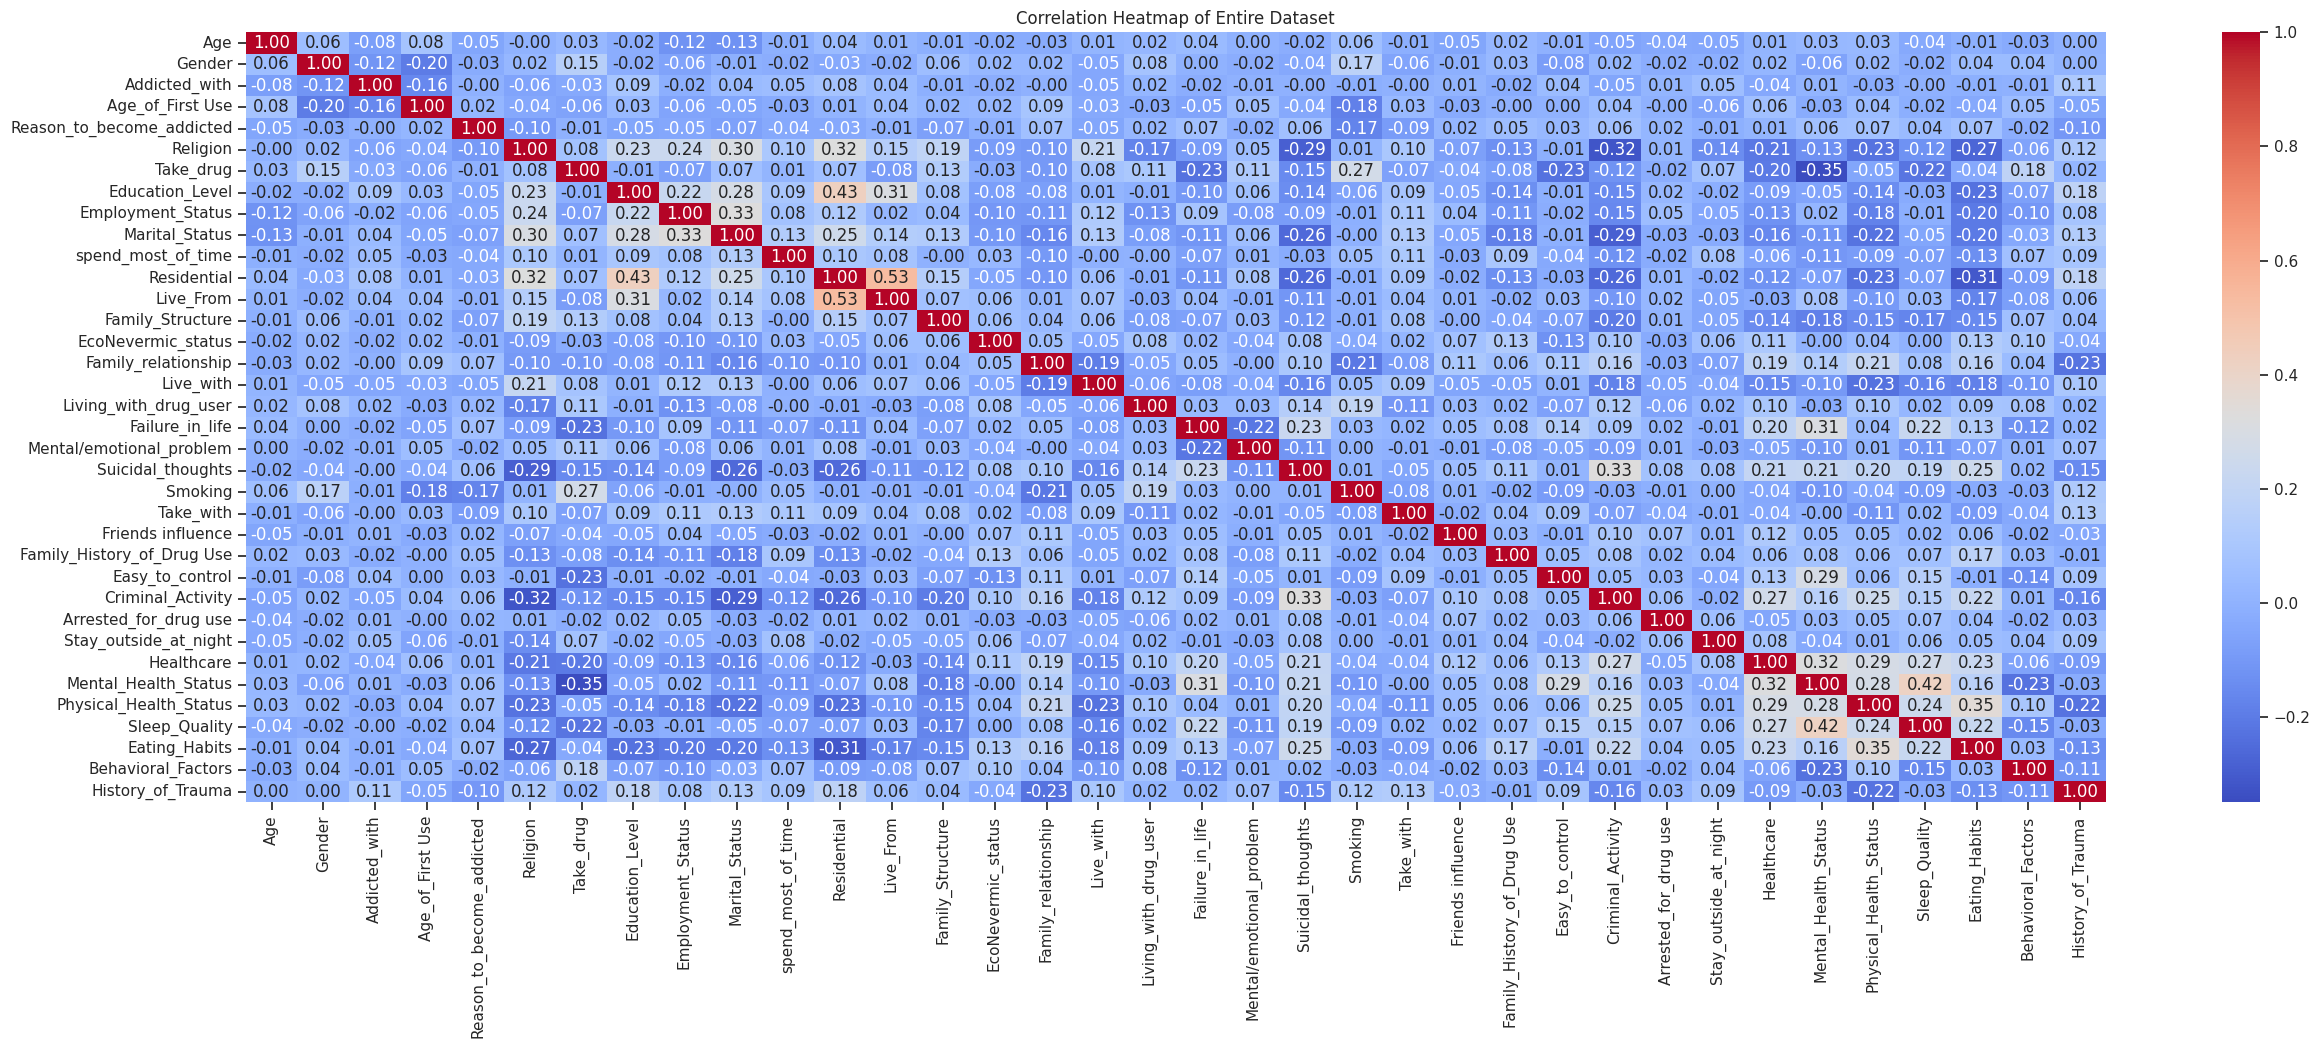

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30, 10))
p = sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Entire Dataset")
plt.show()

Imbalanced visulalization

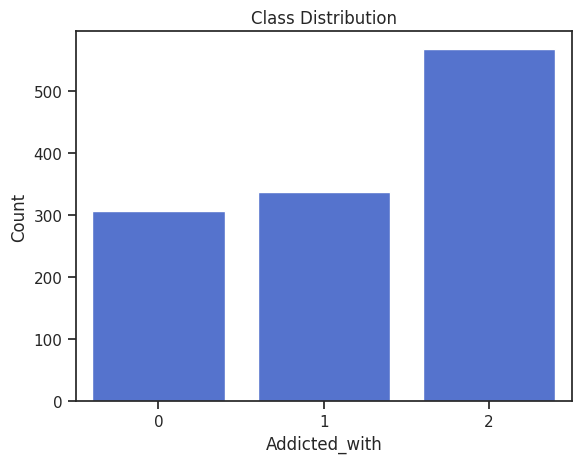

In [274]:
sns.countplot(x='Addicted_with', data=data, color='RoyalBlue')
plt.xlabel('Addicted_with')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


Depoloing the X value and the target value

In [275]:
#X =data.iloc[:,[0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]]
X = data.drop('Addicted_with', axis=1)
#target_columns = ['Employment_Status', 'Employment_Status', 'Religion']
#X = X.drop(columns=target_columns)
y = data['Addicted_with']

Smote for imbalanced data

In [276]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

Class distribution after SMOTE:
Addicted_with
2    568
0    568
1    568
Name: count, dtype: int64


Splite data sets

In [277]:
from sklearn.model_selection import train_test_split
#Taking 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

K-Fold Cross-Validation

In [278]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]


## Principal Component Analysis (PCA)

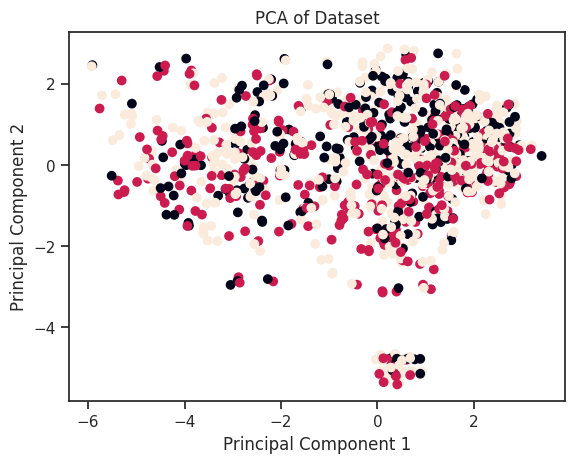

In [279]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#retain enough components to explain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.show()

# Algorithm and clasiffications

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression
Accuracy: 0.74
Recall: 0.74
Precision: 0.77
F1-score: 0.72
              precision    recall  f1-score   support

           0       0.73      0.32      0.45       108
           1       1.00      0.98      0.99       121
           2       0.57      0.88      0.69       112

    accuracy                           0.74       341
   macro avg       0.76      0.73      0.71       341
weighted avg       0.77      0.74      0.72       341



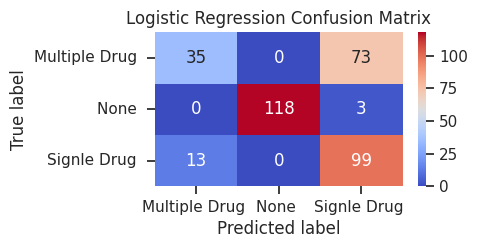

----------------------------------------------------



K-Neighbors Classifier
Accuracy: 0.76
Recall: 0.76
Precision: 0.77
F1-score: 0.76
              precision    recall  f1-score   support

           0       0.71      0.58      0.64       108
           1       0.93      0.88      0.91       121
           2       0.65      0.79      0.71       112

    accuracy                           0.76       341
   macro avg       0.76      0.75      0.75       341
weighted avg       0.77      0.76      0.76       341



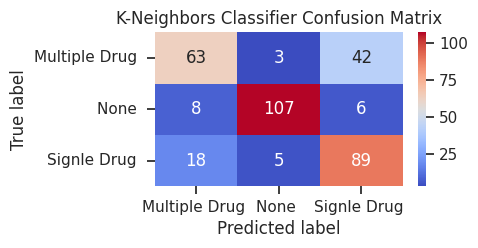

----------------------------------------------------



Support Vector Classifier
Accuracy: 0.71
Recall: 0.71
Precision: 0.80
F1-score: 0.66
              precision    recall  f1-score   support

           0       0.84      0.15      0.25       108
           1       1.00      0.98      0.99       121
           2       0.53      0.97      0.69       112

    accuracy                           0.71       341
   macro avg       0.79      0.70      0.64       341
weighted avg       0.80      0.71      0.66       341



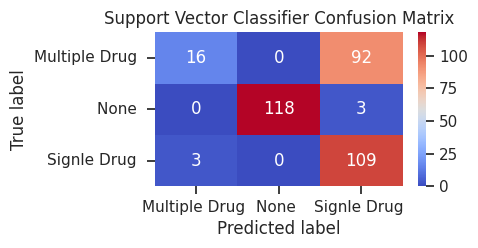

----------------------------------------------------



Decision Tree Classifier
Accuracy: 0.94
Recall: 0.94
Precision: 0.95
F1-score: 0.94
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       108
           1       1.00      0.98      0.99       121
           2       0.87      0.98      0.92       112

    accuracy                           0.94       341
   macro avg       0.94      0.94      0.94       341
weighted avg       0.95      0.94      0.94       341



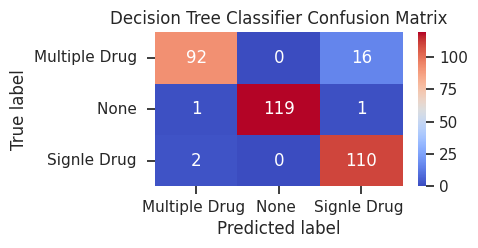

----------------------------------------------------



Random Forest Classifier
Accuracy: 0.95
Recall: 0.95
Precision: 0.95
F1-score: 0.95
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       108
           1       1.00      0.98      0.99       121
           2       0.89      0.97      0.93       112

    accuracy                           0.95       341
   macro avg       0.95      0.95      0.95       341
weighted avg       0.95      0.95      0.95       341



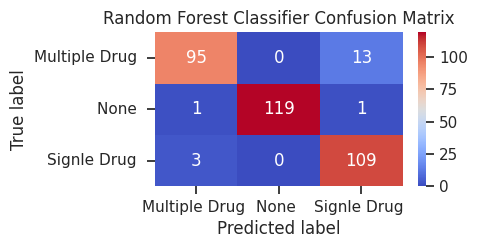

----------------------------------------------------



Gradient Boosting Classifier
Accuracy: 0.85
Recall: 0.85
Precision: 0.87
F1-score: 0.85
              precision    recall  f1-score   support

           0       0.89      0.61      0.73       108
           1       1.00      0.98      0.99       121
           2       0.71      0.95      0.81       112

    accuracy                           0.85       341
   macro avg       0.87      0.84      0.84       341
weighted avg       0.87      0.85      0.85       341



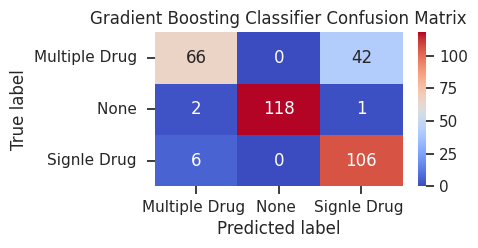

----------------------------------------------------




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Classifier
Accuracy: 0.66
Recall: 0.66
Precision: 0.70
F1-score: 0.66
              precision    recall  f1-score   support

           0       0.59      0.43      0.49       108
           1       1.00      0.79      0.88       121
           2       0.49      0.73      0.59       112

    accuracy                           0.66       341
   macro avg       0.69      0.65      0.66       341
weighted avg       0.70      0.66      0.66       341



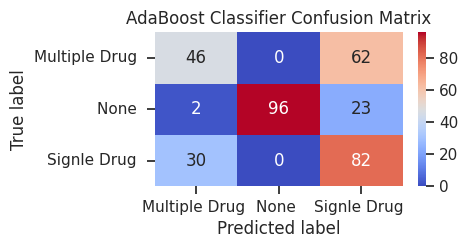

----------------------------------------------------



Gaussian Naive Bayes
Accuracy: 0.77
Recall: 0.77
Precision: 0.78
F1-score: 0.77
              precision    recall  f1-score   support

           0       0.67      0.60      0.63       108
           1       1.00      0.98      0.99       121
           2       0.64      0.72      0.68       112

    accuracy                           0.77       341
   macro avg       0.77      0.77      0.77       341
weighted avg       0.78      0.77      0.77       341



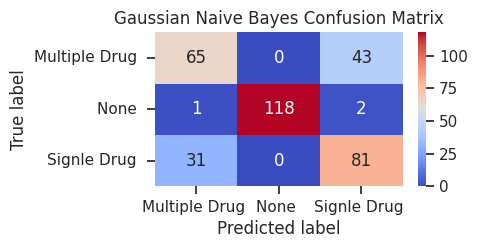

----------------------------------------------------



XGBoost
Accuracy: 0.96
Recall: 0.96
Precision: 0.96
F1-score: 0.96
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       108
           1       1.00      0.98      0.99       121
           2       0.91      0.97      0.94       112

    accuracy                           0.96       341
   macro avg       0.96      0.95      0.95       341
weighted avg       0.96      0.96      0.96       341



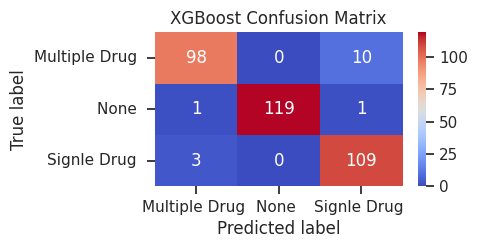

----------------------------------------------------




In [280]:
!pip install catboost
!pip install xgboost
!pip install seaborn matplotlib
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import xgboost as xgb

models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Use 'weighted' average for multiclass classification
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n{name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1-score: {f1:.2f}")

    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Multiple Drug ', 'None ', 'Signle Drug '], yticklabels=['Multiple Drug ', 'None ', 'Signle Drug '])
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    print("-" * 52)
    print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


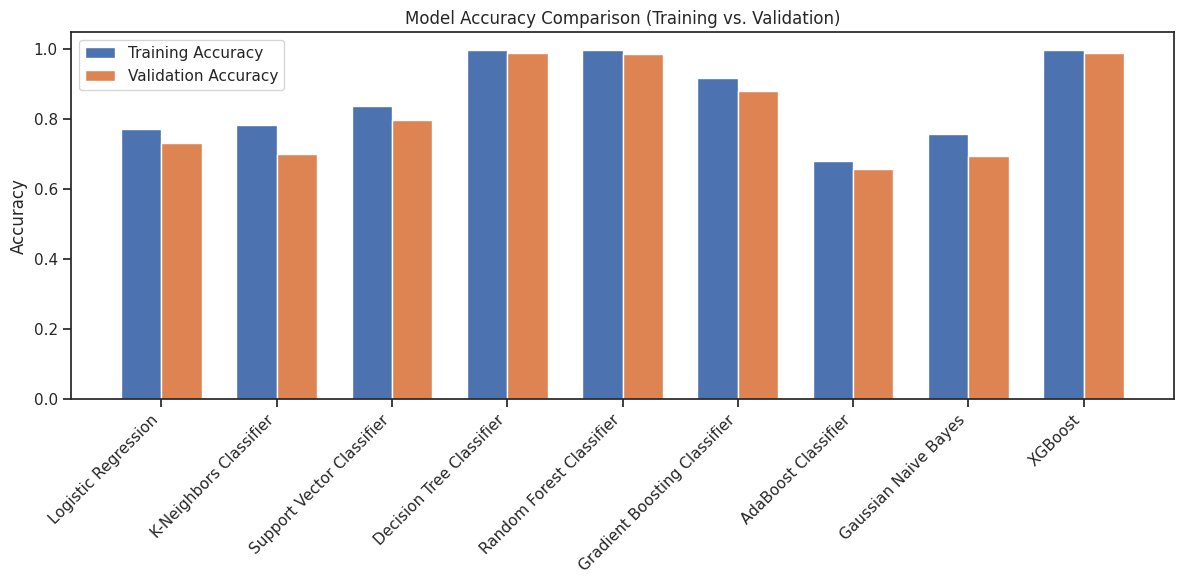

In [281]:
model_names = list(models.keys())
train_accuracies = []
val_accuracies = []

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    train_accuracies.append(accuracy_score(y_train, y_pred_train))
    val_accuracies.append(accuracy_score(y_val, y_pred_val))

plt.figure(figsize=(12, 6))
x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

rects1 = plt.bar(x - width/2, train_accuracies, width, label='Training Accuracy')
rects2 = plt.bar(x + width/2, val_accuracies, width, label='Validation Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison (Training vs. Validation)')
plt.xticks(x, model_names, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()


Logistic Regression
Training Accuracy: 0.77
Validation Accuracy: 0.73

K-Neighbors Classifier
Training Accuracy: 0.78
Validation Accuracy: 0.70

Support Vector Classifier
Training Accuracy: 0.84
Validation Accuracy: 0.80

Decision Tree Classifier
Training Accuracy: 1.00
Validation Accuracy: 0.99

Random Forest Classifier
Training Accuracy: 1.00
Validation Accuracy: 0.98

Gradient Boosting Classifier
Training Accuracy: 0.92
Validation Accuracy: 0.88

AdaBoost Classifier
Training Accuracy: 0.68
Validation Accuracy: 0.66

Gaussian Naive Bayes
Training Accuracy: 0.75
Validation Accuracy: 0.69

XGBoost
Training Accuracy: 1.00
Validation Accuracy: 0.99


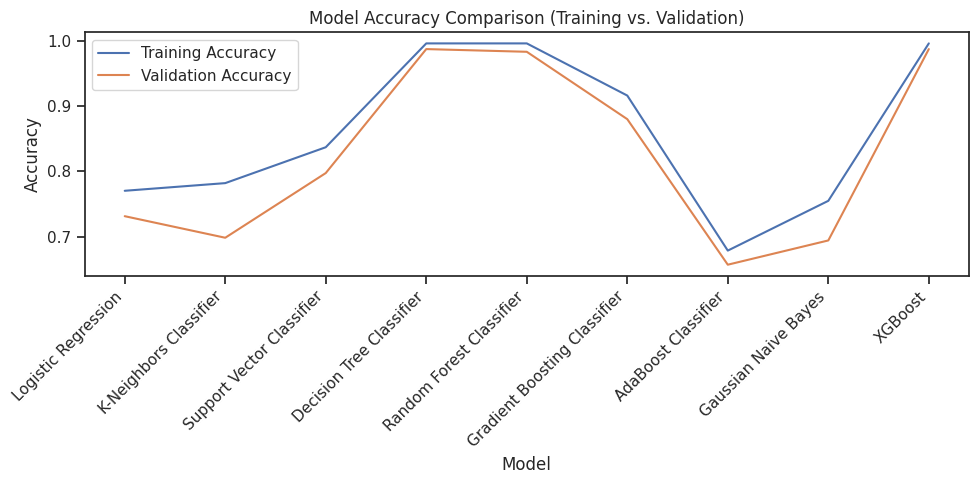

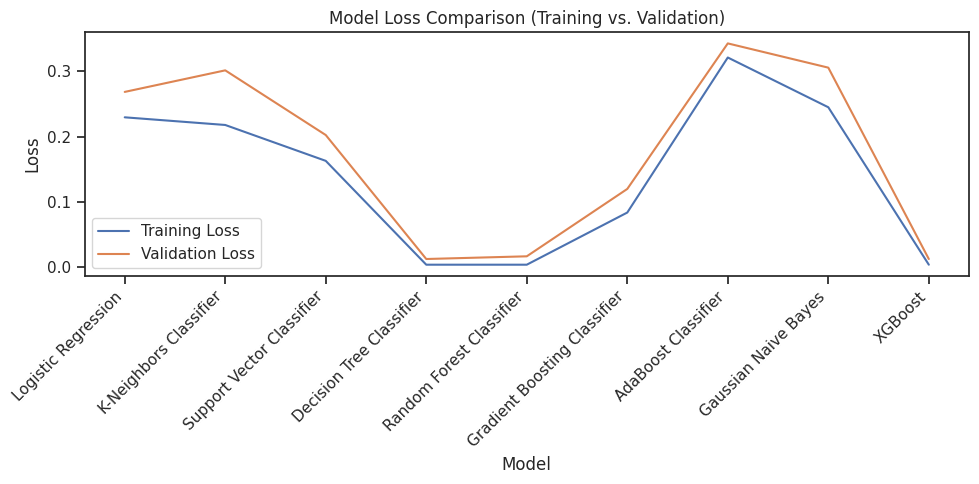

In [282]:
# prompt: find the overfitthing  Training and Validation with Plot accuracy and plot loss with

import matplotlib.pyplot as plt

# Assuming 'models' dictionary and training/validation data are defined as in your original code

# Lists to store accuracy and loss values for training and validation sets
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []  # Placeholder, you'll need to calculate losses based on your models

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


for name, model in models.items():
    # ... your existing model training code ...

    # Calculate training accuracy
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Calculate validation accuracy
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)

    # Placeholder for loss calculation - replace with actual loss computation
    train_loss = 1 - train_accuracy  # Example: loss is 1-accuracy
    train_losses.append(train_loss)
    val_loss = 1 - val_accuracy # Example: loss is 1-accuracy
    val_losses.append(val_loss)

    print(f"\n{name}")
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Validation Accuracy: {val_accuracy:.2f}")

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(list(models.keys()), train_accuracies, label='Training Accuracy')
plt.plot(list(models.keys()), val_accuracies, label='Validation Accuracy')
plt.title('Model Accuracy Comparison (Training vs. Validation)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(list(models.keys()), train_losses, label='Training Loss')
plt.plot(list(models.keys()), val_losses, label='Validation Loss')
plt.title('Model Loss Comparison (Training vs. Validation)')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()